# Final Project Report Codebook
## Identify good journal and good article
### Weina Ke

<font size="3">
    The reasearch of anything generally starts from gathering information, and for scientific research, this specific act is given an interesting name call literature review. The process of literature review often starts by gathering enough research papers to build a basic knowledge base, which involves tidious amount of searching and reading, and most fraustring part of this process is, this article might not be a credible source. Same thing goes for later on publishing your research, it's rather head scratching to find a "right" journal to publish. 
    Most of the time when you ask your mentor/professor, they would say, go find ones that has high impact fator (IF). IF is a calculated value based on a two-year period and involves dividing the number of times articles were cited by the number of articles that are citable. (https://researchguides.uic.edu/if/impact) This value is somewhat arbitruray based on which field you are researching in, since the popularity of a field also affects how many articles are there to cite and be cited. 
    In general, a higher than average impact factor does mean the journal is popular, but how there are tons of journals and articles out there, how should a naive user like us get started without any background? And as paronoid as a scientist should be, does this impact factor reflect the past glory of the journal, and what is the role of most cited paper play in this journal. This would help researcher get head start in picking the journals and articles to read.
</font>

# #1. Data
<font size="3">
    Search tools researcher generally use can diverse based on available source, for instance, if your institute has subscription to professional database or large publish vendors like Elsevier, you might be able to search directly in the database website. The best literature research tool is the google scholar, which gives basically all that exists in public internet, and you can request articles that aren't free through your institute.
    The google scholoar provides top related article on specific search terms and provides the citation number, but the most cited articles doesn't really represent the best article for your topic, and especially hard for starters to build the knowloge base. Better approach would be finding high IF journal in your field and looking into their best articles.
    To do this, we here recommned https://exaly.com/, which is "a non-profit endeavour to address the absence of a comprehensive, unbiased, and independent bibliographic database." On here, you can get IF of journal for free (believe it or not, getting IF of a journal sometimes has a cost for some reason". 
    The exaly website supports web scraping, thus the data will be gathered with designated script. In this project, we will use field of <strong>nanomaterial for cancer research</strong> as example.
</font>


#### exaly statics: https://exaly.com/statistics.html
#### exaly journal coverage and licence information: https://exaly.com/about.html
#### GitHub script link: [here](https://github.com/sweetweina/Springboard_assignment/blob/fa87007ff594016b7e33d5b4c484c3d549194613/Capstone_Final_Delivery/1_Data_Acquiring/User_main.ipynb)

# #2. Method

In this study, we will mimic a starting scientist utilizing limited keywords that are associated with field. The information we gather will be:

1. Journal name
2. Total article number
3. Total citation number of the journal
4. Most cited article title
5. Published year of the most cited article
6. Most cited article citation numeber
7. Keyword used to search the article
8. Impact factor
    
Note that the nature of publication and journal is relative complex as the availability of information and the accessibility of a article varies. <br>
    For human the most nature and understandable way of determining "if a journal is good" will be a decision tree, and we will also adapt random forest classifier. For the fun of if we will use a random forest regressor to try to predict the impact factor. The mere number can be challenge to ration, hence we will do the nature thing: assign a psuedo category to the values as follow: <br>
   <strong> Total citation number of the journal: </strong> 2, 687, 6500, 48200, 3400000 <br>
   <strong> Total article number: </strong> 66, 233, 822, 2500, 53900 <br>
   <strong> Mst cited article citation numeber: </strong> 13, 71, 226, 667, 40300 <br>
   <strong> Published year of the most cited article: </strong> 1966-1970, 1971-1975, 1976-1980, 1981-1985, 1986-1990, 1991-1995, 1996-2000, 2001-2005, 2006-2010, 2011-2015, 2016-2020, 2021-2025 <br>
   <strong> Impact factor: </strong> 0-0.99, 1-3.99, 4-6.99, 7-9.99, 10-27.99, 28-213.99 <br>

The bins represent the percentiles of <strong>0, 50, 80, 90, 95, 99, 100.</strong> This method of categorizing is a more generalizable which can be applied to all fields of study with a relatively large journal base. Note that some field may have their "goto" journal, like, lancet, for medical studies. For these fields, please refer to the goto journal to begin your knowlege base building. Otherwise, let's see what we can do with our project here to establish some basic understanding of the field.


# #3. Data Cleaning

#### The data cleaning workbook is [Keyword Formatting](https://github.com/sweetweina/Springboard_assignment/blob/3bddedf5b98e12fa0caae31385ba7d4c94faa126/Capstone_Final_Delivery/2_Data_Cleaning/feature_engineering_capstone.ipynb) and [Initial Exploration](https://github.com/sweetweina/Springboard_assignment/blob/56b054b09b3a9a5182d6062045386358d071ccbc/Capstone_Final_Delivery/2_Data_Cleaning/Journal_Capstone_Data_Wrangling.ipynb). <br>
In our project, we wrote the data acquisisium scripts ourselves, hence we already done quite some data quality control when we are web scraping for data. In this workbook, we are focusing on formatting the dataset to what the model would desire. 
In this step, we created new keyword columns and exam their presence in the title of most cited article and the journal name, and drop non-representative column. Note that the values in the [Initial Exploration](https://github.com/sweetweina/Springboard_assignment/blob/56b054b09b3a9a5182d6062045386358d071ccbc/Capstone_Final_Delivery/2_Data_Cleaning/Journal_Capstone_Data_Wrangling.ipynb) is the earlest attempt for the capstone project, the latest [Keyword Formatting](https://github.com/sweetweina/Springboard_assignment/blob/3bddedf5b98e12fa0caae31385ba7d4c94faa126/Capstone_Final_Delivery/2_Data_Cleaning/feature_engineering_capstone.ipynb) represents our effort to include more relevant keywords and provide better example. <br>
We gathered information for 2072 unique journals searched with keywords: <br>
<strong>"theranostic", "nanomedicine", "nanodevice", "nanotechnology", "delivery", 
"diagnosis", "treatment", "cancer", "therapeutic", "antitumor", "nanostructure", 
"nanoparticle", "therapy", "tumor", "nanocarrier", "imaging", "nanoformulation",
"target"</strong><br>
paired with <strong>"cancer"</strong>.

# #4. EDA
In general, different pair of keywords may yield different search results, and let's count the numnber Search Keyword results


In the EDA step, we have couple more questions of interest to ask then looking for impact factor. The first being how are the search results from keywords vary? The reason being some keywords we deem different might have similar meanning or are closely related. Although this question is not we intended to solve in this project, the answer may help we to write more informative keywords in our paper, and create more efficeint search querrys to gather as much information of the field as possible. 

### Pairwise Venn diagram for keywords

#### Very interesting result, we see most pairs overlaps with the other, but some stands out as independent of each other. Let's see the first 20 of the least overlapping pairs:
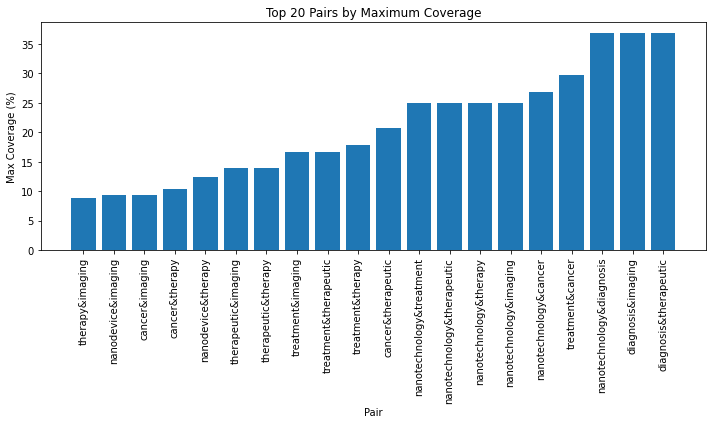

Interestingly, journals found by therapy and imaging actually has the least overlap, which is somewhat not expexted as one would expect imaging as supportive method for therapy or theraputic analysis. Keyword pairs that has 100 overlap are shown as a nexus below. Apparently keywords that a relatively new like theranostic, nanoformulation and keywords taht are more general, like nanomedicne and antitumor, are least usefull in search. But if given time to populate the literature base, new keywords can gain importance.<br>
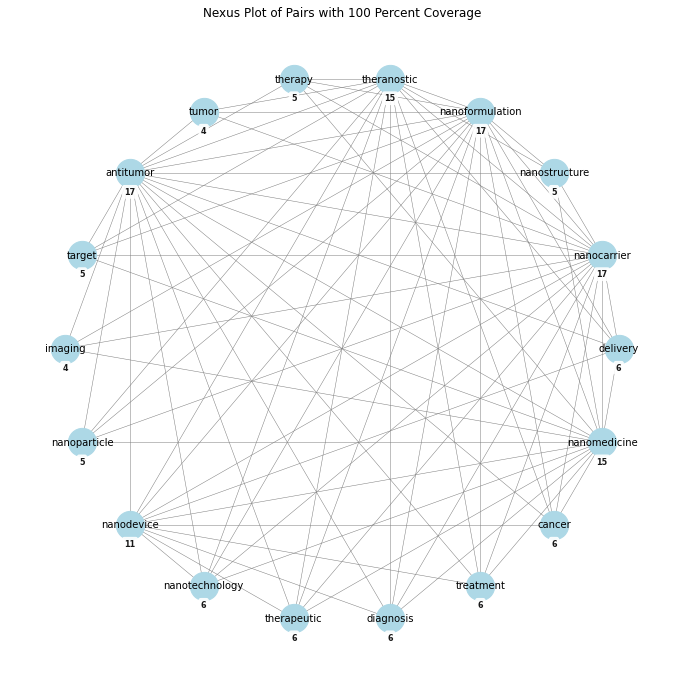

Year distribution of most cited ariticle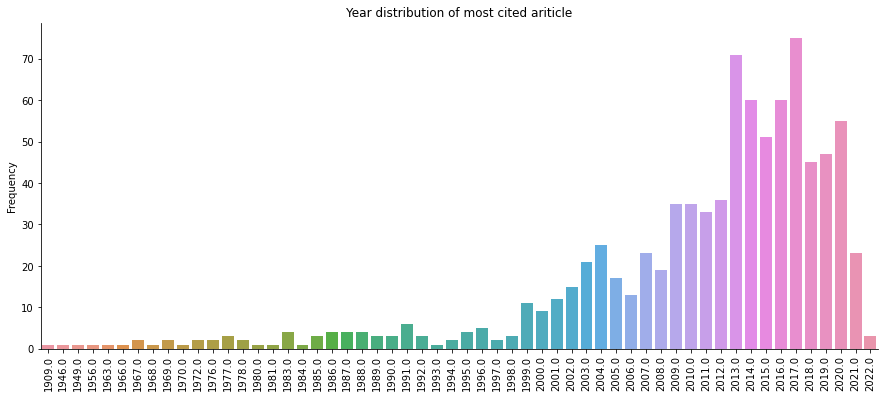